In [64]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import pandas as pd

In [65]:
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

In [66]:
train_labels[0].shape,
train_data[0].shape


(28, 28)

In [67]:
label_names = [    'T-shirt/top',    'Trouser',    'Pullover',    'Dress',    'Coat',    'Sandal',    'Shirt',    'Sneaker',    'Bag',    'Ankle boot']

'T-shirt/top'

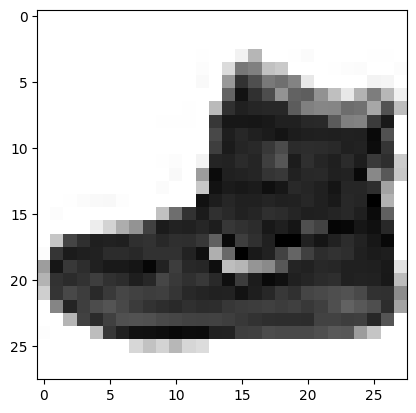

In [68]:
import matplotlib.pyplot as plt

plt.imshow(train_data[0],cmap=plt.cm.binary)
label_names[0]

In [69]:
num_labels = len(np.unique(train_labels))

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(num_labels, activation="softmax")
])

model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

non_norm_history = model_1.fit(train_data,
                      tf.one_hot(train_labels, depth=num_labels),
                      epochs=10,
                      validation_data=(test_data, tf.one_hot(test_labels, depth=num_labels)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3412 - accuracy: 0.1330 - val_loss: 2.1097 - val_accuracy: 0.1619
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0458 - accuracy: 0.1842 - val_loss: 1.9889 - val_accuracy: 0.2200
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9181 - accuracy: 0.2290 - val_loss: 1.7512 - val_accuracy: 0.2614
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7096 - accuracy: 0.2719 - val_loss: 1.6833 - val_accuracy: 0.2508
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6654 - accuracy: 0.2761 - val_loss: 1.6515 - val_accuracy: 0.2795
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6462 - accuracy: 0.2768 - val_loss: 1.6474 - val_accuracy: 0.2942
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6337 - accuracy: 0.2829 - val_loss: 1.6234 - val_accuracy:

In [70]:
#Normalization
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0


In [71]:

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(num_labels, activation="softmax")
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

norm_history = model_2.fit(train_data,
                      train_labels,
                      epochs=10,
                      validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3593 - accuracy: 0.0993 - val_loss: 2.2986 - val_accuracy: 0.1023
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2374 - accuracy: 0.1278 - val_loss: 2.1000 - val_accuracy: 0.1487
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8464 - accuracy: 0.2016 - val_loss: 1.7543 - val_accuracy: 0.2240
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6828 - accuracy: 0.2583 - val_loss: 1.6125 - val_accuracy: 0.2979
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5796 - accuracy: 0.3093 - val_loss: 1.5622 - val_accuracy: 0.2994
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5358 - accuracy: 0.3369 - val_loss: 1.5118 - val_accuracy: 0.3581
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5080 - accuracy: 0.3495 - val_loss: 1.4952 - val_accuracy:

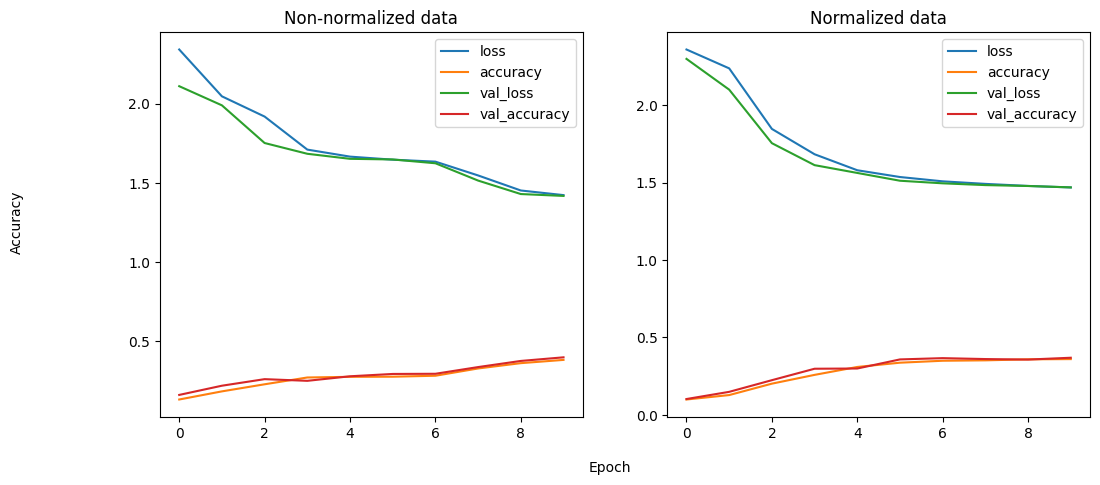

In [72]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
pd.DataFrame(non_norm_history.history).plot(ax=axs[0], title="Non-normalized data")

pd.DataFrame(norm_history.history).plot(ax=axs[1], title="Normalized data")
fig.text(0.5, 0, 'Epoch', ha='center')
fig.text(0, 0.5, 'Accuracy', va='center', rotation='vertical')

plt.show()

In [73]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_3.compile(loss="SparseCategoricalCrossentropy",
                optimizer="Adam",
                metrics="accuracy")
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

lr_history= model_3.fit(train_data_norm,
                        train_labels,
                        epochs=40,
                        validation_data=(test_data_norm,test_labels),
                        callbacks=[lr_scheduler]
                        )

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3951 - accuracy: 0.4089 - val_loss: 1.0111 - val_accuracy: 0.6267 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8808 - accuracy: 0.6805 - val_loss: 0.8109 - val_accuracy: 0.7218 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7267 - accuracy: 0.7537 - val_loss: 0.7224 - val_accuracy: 0.7518 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6740 - accuracy: 0.7727 - val_loss: 0.6837 - val_accuracy: 0.7741 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6520 - accuracy: 0.7764 - val_loss: 0.6661 - val_accuracy: 0.7781 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6384 - accuracy: 0.7813 - val_loss: 0.6802 - val_accuracy: 0.7770 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

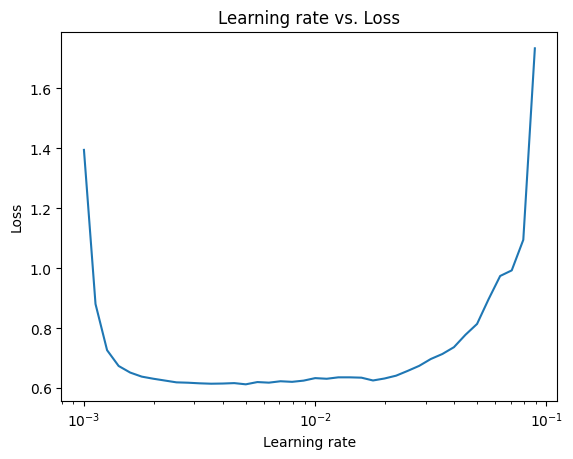

In [74]:
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(tf.range(40)/20))

plt.semilogx(lrs,lr_history.history["loss"])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs. Loss')
plt.show()

In [75]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_4.compile(loss="SparseCategoricalCrossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics="accuracy")

history_lr_special= model_4.fit(train_data_norm,
                        train_labels,
                        epochs=30,
                        validation_data=(test_data_norm,test_labels),
                        )

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3968 - accuracy: 0.4746 - val_loss: 1.0439 - val_accuracy: 0.6097
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9109 - accuracy: 0.6673 - val_loss: 0.8180 - val_accuracy: 0.7270
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7159 - accuracy: 0.7609 - val_loss: 0.7105 - val_accuracy: 0.7591
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6550 - accuracy: 0.7722 - val_loss: 0.6726 - val_accuracy: 0.7733
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6306 - accuracy: 0.7759 - val_loss: 0.6583 - val_accuracy: 0.7748
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6164 - accuracy: 0.7779 - val_loss: 0.6490 - val_accuracy: 0.7723
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6078 - accuracy: 0.7805 - val_loss: 0.6514 - val_accuracy:

In [76]:

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
 
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] 
  n_classes = cm.shape[0] 


  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) 
  fig.colorbar(cax)


  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  

  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), 
         yticks=np.arange(n_classes), 
         xticklabels=labels,
         yticklabels=labels)
  

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()


  threshold = (cm.max() + cm.min()) / 2.


  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [78]:
y_probs = model_4.predict(test_data_norm)

313/313 [==============================] - 1s 2ms/step


In [79]:
y_probs[0]

array([1.8053356e-08, 1.5042454e-08, 6.2853797e-13, 3.6822081e-09,
       8.1879850e-11, 4.4424281e-01, 2.2373426e-08, 9.0772882e-02,
       7.3677365e-05, 4.6491054e-01], dtype=float32)

In [80]:
y_preds= y_probs.argmax(axis=1)

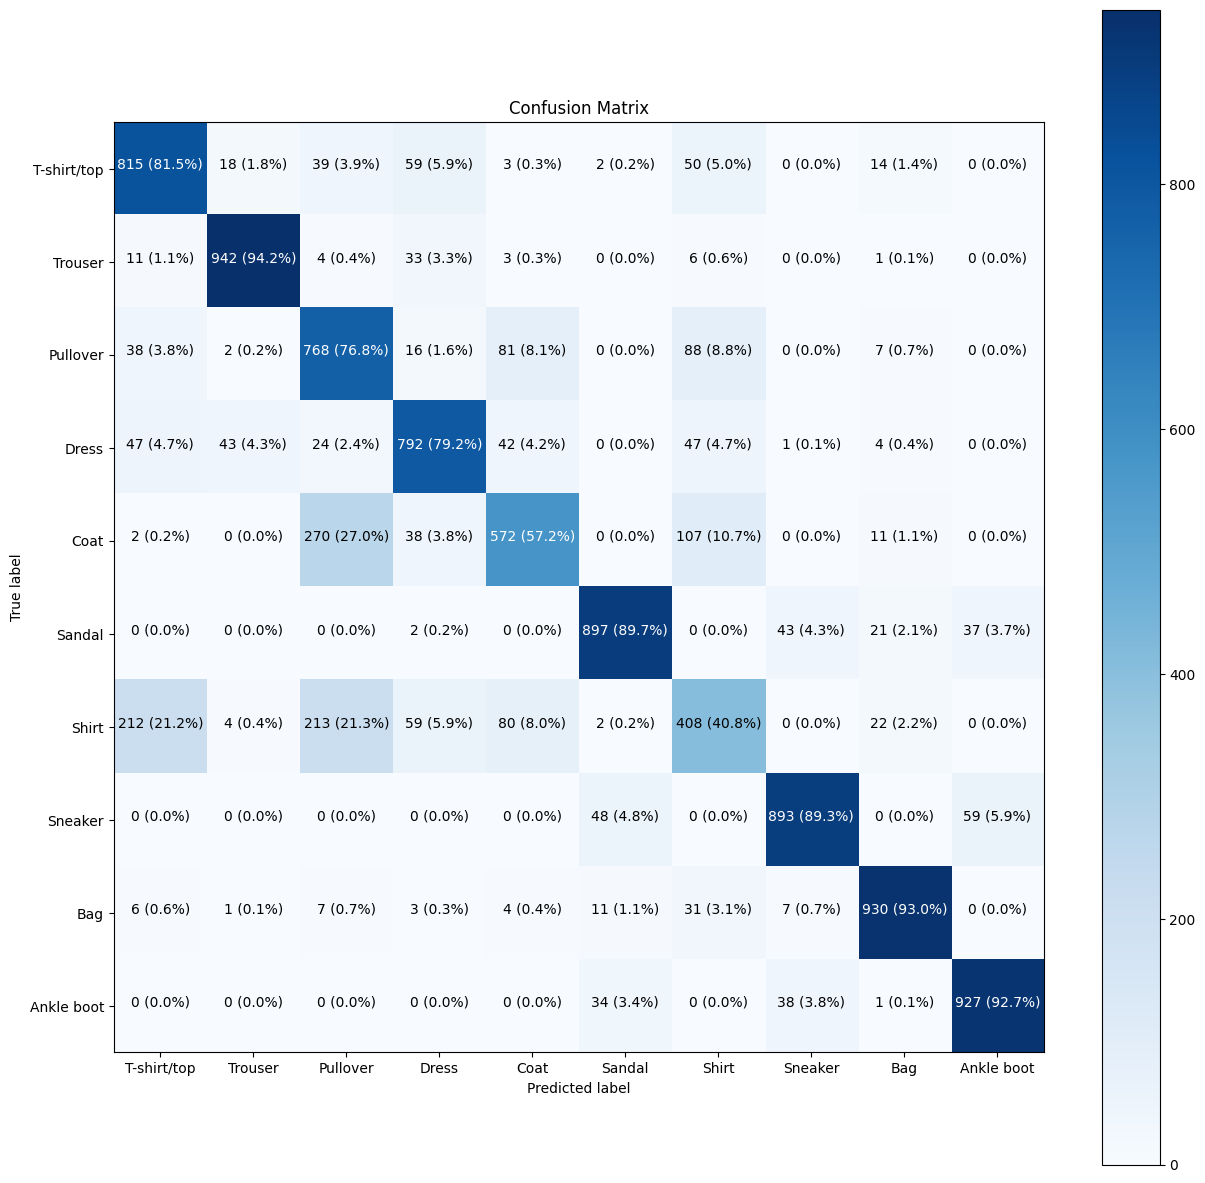

In [84]:
make_confusion_matrix(
    y_true=test_labels,
    y_pred=y_preds,
    classes=label_names,
    figsize=(15,15),
    text_size=10
)

In [96]:
import random
import matplotlib.pyplot as plt


def plot_random_image(model, images, true_labels, classes):
  i = random.randint(0, len(images))
  

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) 
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]


  plt.imshow(target_image, cmap=plt.cm.binary)

 
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"


  plt.xlabel("Pred 1: {} {:2.0f}% (True: {})\nPred 2: {} {:2.0f}%".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label,
                                                   classes[pred_probs.argsort()[0][-2]],
                                                   100*pred_probs[0][pred_probs.argsort()[0][-2]]), 
             color=color) 



1/1 [==============================] - 0s 23ms/step


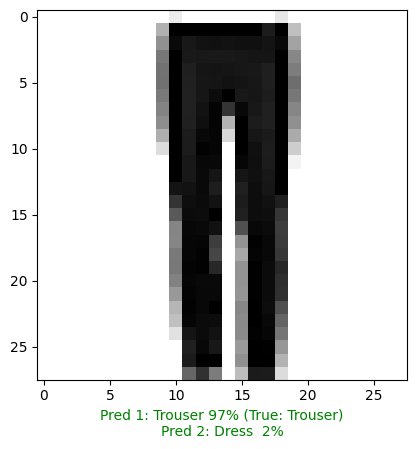

In [101]:
plot_random_image(model=model_4,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=label_names)